### Importing scripts folder


In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

### Loading Libraries we will use in the project 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

### Importing scripts & modules 

In [3]:
from helper import MyHelper
import utility
import plots

### Loading the data

In [4]:
CSV_PATH1 = 'C:/Users/ende/Desktop/dvc/new_data/trainnew.csv'
CSV_PATH2 = 'C:/Users/ende/Desktop/dvc/new_data/testnew.csv'
CSV_PATH3 = 'C:/Users/ende/Desktop/dvc/new_data/storenew.csv'

In [5]:
# the class has utility function we are going to use
Helper = MyHelper()

In [6]:
df1 = Helper.read_csv(CSV_PATH1)
df2 = Helper.read_csv(CSV_PATH2)
df3= Helper.read_csv(CSV_PATH3)

c:\Users\ende\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


>> file read as csv
>> file read as csv
>> file read as csv


# Exploring the data

### Getting the basic info about the dataset

In [7]:
df=[df1,df2,df3]
for i in df:

    print(i.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             41088 non-null  int64 
 1   Store          41088 non-null  int64 
 2   DayOfWeek      41088 non-null  int64 
 3   Date     

### Getting the basic description of the dataset

In [8]:
print(f" There are {df1.shape[0]} rows and {df1.shape[1]} columns")

 There are 1017209 rows and 9 columns


### Checking for duplicates

In [9]:
df1.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [10]:
#Droping if there is any duplicates in the dataset
df1.drop_duplicates()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Checking the null counts

In [11]:
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Checking for missing values

In [12]:
#The percent_missing function checkes any missing values and convert it into percentage 
for i in df:
    utility.percent_missing(i)



The dataset contains 0.0 % missing values.
The dataset contains 0.0 % missing values.
The dataset contains 0.0 % missing values.


In [13]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [14]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [15]:
df3.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,date
0,1,c,a,1270.0,0,2008-09-01
1,2,a,a,570.0,1,2007-11-01
2,3,a,a,14130.0,1,2006-12-01
3,4,c,c,620.0,0,2009-09-01
4,5,a,a,29910.0,0,2015-04-01


In [16]:
df3['date'] = pd.to_datetime(df3['date'])

In [17]:
df3.dtypes

Store                           int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
date                   datetime64[ns]
dtype: object

In [18]:
#combining the training  dataset with the store dataset.
train_final = df1.merge(df3, on='Store')
train_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2008-09-01
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,2008-09-01
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,2008-09-01
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,2008-09-01
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,2008-09-01


In [19]:
train_final.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
date                   0
dtype: int64

In [20]:
CLEANED_CSV_PATH = "../Data\\trainfinal.csv"
Helper.save_csv(train_final, CLEANED_CSV_PATH)

>> File Successfully Saved.!!!


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2008-09-01
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,2008-09-01
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,2008-09-01
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,2008-09-01
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,2008-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,1,2006-04-01
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,1,2006-04-01
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,1,2006-04-01
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,1,2006-04-01


In [21]:
#combining the test  dataset with the store dataset.
test_final = df2.merge(df3, on='Store')
test_final.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,date
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,0,2008-09-01
1,857,1,3,2015-09-16,1,1,0,0,c,a,1270.0,0,2008-09-01
2,1713,1,2,2015-09-15,1,1,0,0,c,a,1270.0,0,2008-09-01
3,2569,1,1,2015-09-14,1,1,0,0,c,a,1270.0,0,2008-09-01
4,3425,1,7,2015-09-13,0,0,0,0,c,a,1270.0,0,2008-09-01


In [22]:
CLEANED_CSV_PATH = "../Data\\testfinal.csv"
Helper.save_csv(test_final, CLEANED_CSV_PATH)

>> File Successfully Saved.!!!


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,date
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,0,2008-09-01
1,857,1,3,2015-09-16,1,1,0,0,c,a,1270.0,0,2008-09-01
2,1713,1,2,2015-09-15,1,1,0,0,c,a,1270.0,0,2008-09-01
3,2569,1,1,2015-09-14,1,1,0,0,c,a,1270.0,0,2008-09-01
4,3425,1,7,2015-09-13,0,0,0,0,c,a,1270.0,0,2008-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1,1,0,1,d,c,5350.0,1,2006-04-01
41084,38520,1115,2,2015-08-04,1,1,0,1,d,c,5350.0,1,2006-04-01
41085,39376,1115,1,2015-08-03,1,1,0,1,d,c,5350.0,1,2006-04-01
41086,40232,1115,7,2015-08-02,0,0,0,1,d,c,5350.0,1,2006-04-01


##### Q1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

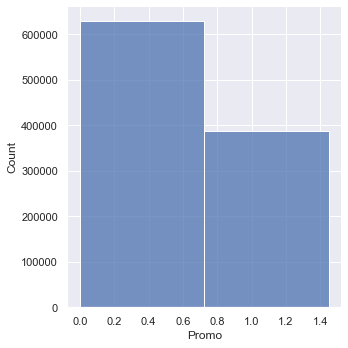

In [23]:
sns.displot(train_final, x="Promo",binwidth=0.725)

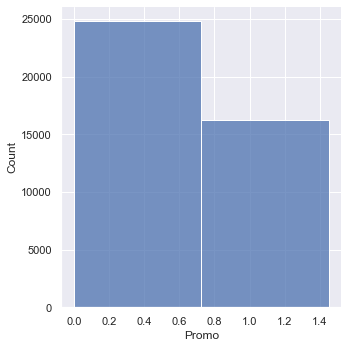

In [24]:
sns.displot(test_final, x="Promo",binwidth=0.725)

##### based on the distributio plot promo is distributed similarly in both test and training dataset.

##### Q2 Check & compare sales behavior before, during and after holidays

<AxesSubplot:>

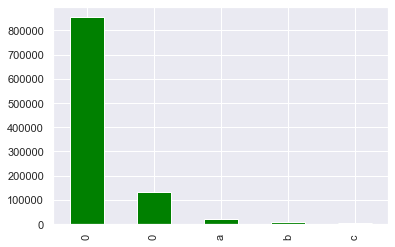

In [25]:
train_final['StateHoliday'].value_counts().plot(kind='bar',color='green')

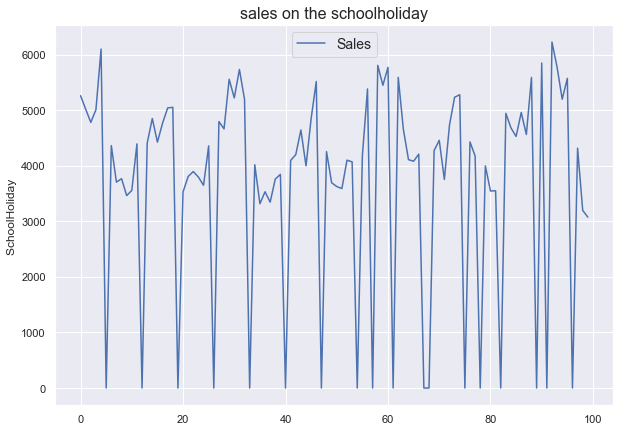

In [26]:
import matplotlib.pyplot as plt
train_final['Sales'][0:100].plot(figsize=(10, 7))
plt.ylabel("SchoolHoliday ")
plt.title("sales on the schoolholiday", fontsize=16)
plt.legend(fontsize=14)

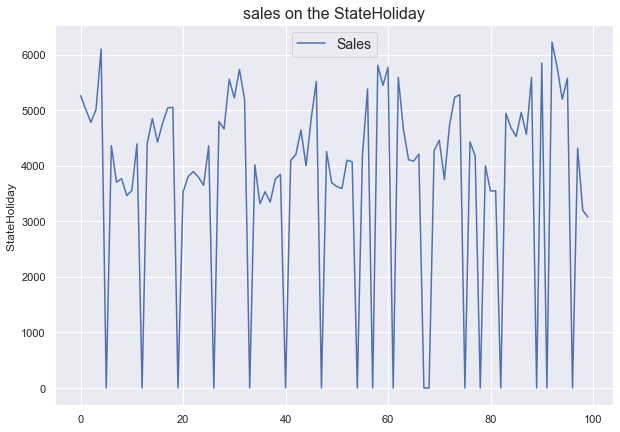

In [27]:
import matplotlib.pyplot as plt
train_final['Sales'][0:100].plot(figsize=(10, 7))
plt.ylabel("StateHoliday ")
plt.title("sales on the StateHoliday", fontsize=16)
plt.legend(fontsize=14)

##### Q4 What can you say about the correlation between sales and number of customers?


<AxesSubplot:>

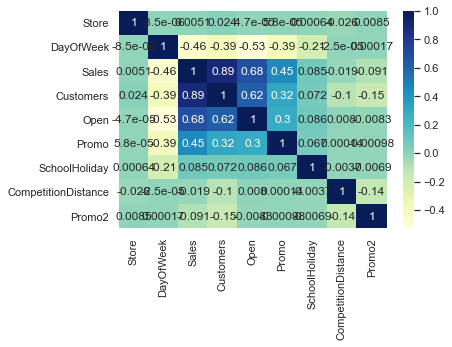

In [28]:
#data=train_final[['Sales','Customers']].value_counts()
data=train_final
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [29]:
train_final.Customers.unique()

array([ 555,  546,  523, ..., 3727, 4022, 4106], dtype=int64)

##### Q4 How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [30]:
train_final.Promo2.unique()

array([0, 1], dtype=int64)

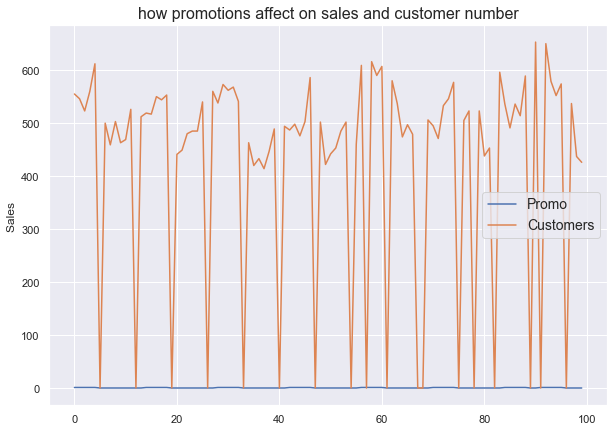

In [41]:
import matplotlib.pyplot as plt
train_final[['Promo','Customers']][0:100].plot(figsize=(10, 7))
plt.ylabel("Sales ")
plt.title("how promotions affect on sales and customer number", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
train_final.DayOfWeek

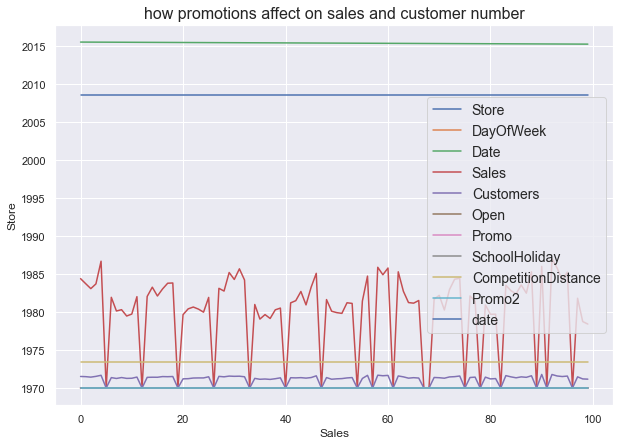

In [55]:
import matplotlib.pyplot as plt
train_final[0:100].plot(figsize=(10, 7))
plt.ylabel("Store")
plt.xlabel("Sales")
plt.title("how promotions affect on sales and customer number", fontsize=16)
plt.legend(fontsize=14)

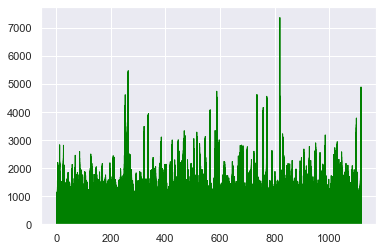

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style
sns.set_theme()

#create seaborn area chart
plt.stackplot(train_final.Store, train_final.Customers,color='green')

##### Q6 Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


##### Q7 Trends of customer behavior during store open and closing times

c:\Users\ende\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


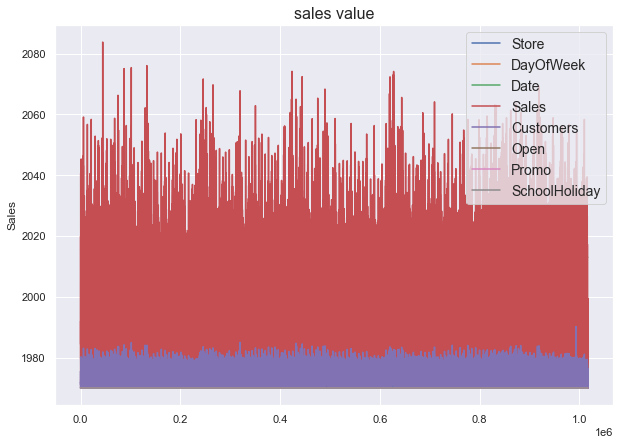

In [33]:
import matplotlib.pyplot as plt
train_final.plot(figsize=(10, 7))
plt.ylabel("Sales")
plt.title("sales value", fontsize=16)
plt.legend(fontsize=14)

##### Q8 Which stores are opened on all weekdays? How does that affect their sales on weekends? 


In [ ]:
train_final.Assortment

##### Check how the assortment type affects sales

Text(0.5, 1.0, 'assortment type with sales')

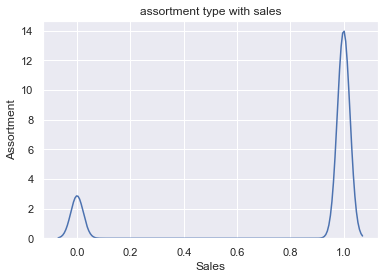

In [35]:
sns.kdeplot(train_final['Open'])
plt.xlabel('Sales')
plt.ylabel('Assortment')
plt.title('assortment type with sales')

#### Q10 How does the distance to the next competitor affect sales?

Text(0.5, 1.0, 'CompetitionDistance with sales')

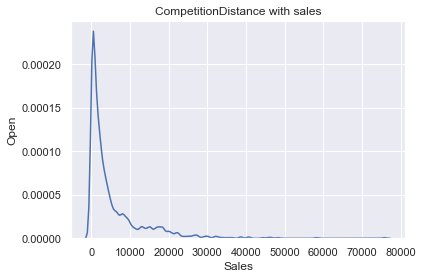

In [36]:
sns.kdeplot(train_final['CompetitionDistance'])
plt.xlabel('Sales')
plt.ylabel('Open')
plt.title('CompetitionDistance with sales')